In [2]:
import pandas as pd
import seaborn as sns
import requests
import kaggle
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

How do I download using requests / API? <br>
https://github.com/Kaggle/kaggle-api <br>
kaggle datasets download -d christophercorrea/dc-residential-properties 

**General Exploration of the Data:**

In [3]:
#how do I not write the entire file path?
data = pd.read_csv('/Users/Julia/dc-residential-properties/DC_Properties.csv', low_memory=False)
print(data.shape)
print(data.columns.tolist())
data.head()

(158957, 49)
['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT']


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,0152,-77.040429,38.914881,NW


In [4]:
ddat = pd.DataFrame.drop(data, columns = 'Unnamed: 0')

In [5]:
#combine BR columns
ddat['BATHRMS'] = ddat['BATHRM'] + ddat['HF_BATHRM']
ddat = pd.DataFrame.drop(ddat, columns = ['BATHRM', 'HF_BATHRM'])

In [6]:
#percentages of NaN values per column
def perc_nan(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    print(percnan)
perc_nan(ddat)

HEAT                  0.000000
AC                    0.000000
NUM_UNITS             0.328774
ROOMS                 0.000000
BEDRM                 0.000000
AYB                   0.001705
YR_RMDL               0.490881
EYB                   0.000000
STORIES               0.329051
SALEDATE              0.168410
PRICE                 0.382122
QUALIFIED             0.000000
SALE_NUM              0.000000
GBA                   0.328774
BLDG_NUM              0.000000
STYLE                 0.328774
STRUCT                0.328774
GRADE                 0.328774
CNDTN                 0.328774
EXTWALL               0.328774
ROOF                  0.328774
INTWALL               0.328774
KITCHENS              0.328781
FIREPLACES            0.000000
USECODE               0.000000
LANDAREA              0.000000
GIS_LAST_MOD_DTTM     0.000000
SOURCE                0.000000
CMPLX_NUM             0.671226
LIVING_GBA            0.671226
FULLADDRESS           0.332901
CITY                  0.332832
STATE   

In [7]:
#delete NaN rows from X, Y, and ASSESSMENT_NBHD so we can use them as reference points for filling others
ddat = ddat.dropna(subset=['X', 'Y', 'ASSESSMENT_NBHD'])

In [8]:
#Are values the same for CITY and STATE?
print(ddat.CITY.value_counts())
print(ddat.STATE.value_counts())

WASHINGTON    105815
Name: CITY, dtype: int64
DC    105815
Name: STATE, dtype: int64


-  Drop because unessential and high percentage of missing data:
    -  CMPLX_NUM
-  Drop because same values for all
    -  STATE
    -  CITY
-  Drop because we have latitute/longitude and x/y coords and NA values will be difficult to fill accurately:
    -  FULLADDRESS
    -  NATIONALGRID

In [9]:
ddat = pd.DataFrame.drop(ddat, columns=['CMPLX_NUM', 'STATE', 'CITY', 'FULLADDRESS', 'NATIONALGRID'])
print(ddat.shape)

(158720, 42)


**Creating the dataset for price prediction:**

In [10]:
#We will make a small dataset, which contains no null values from price. 
sdat = ddat.dropna(subset=['PRICE'])
print(sdat.shape)

(98115, 42)


In [11]:
#if we remove all NaNs, we have no data.
nandat = sdat.dropna()
nandat.head()

,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,BATHRMS


*We will treat categorical and numerical data differently to detect outliers.*

In [12]:
#types of data in df
sdat.dtypes

HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
LIVING_GBA            float64
ZIPCODE               float64
LATITUDE              float64
LONGITUDE             float64
ASSESSMENT_NBHD        object
ASSESSMENT

In [13]:
#TWO LISTS OF COLUMNS. ONE CATEGORICAL, ONE NUMERICAL: catcol and numcol
#TWO corresponding dataframes: catdf and numdf
catcol = []
numcol = []

for col in sdat.columns:
    if (sdat[col].dtype == object):
        catcol.append(col)
    if (sdat[col].dtype == np.int64) or (sdat[col].dtype == np.float64):
        numcol.append(col)
        
catdf = sdat[catcol].astype('category')
numdf = sdat[numcol].astype(np.float64)

print(catcol)
print(numcol)

['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'QUADRANT']
['NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'PRICE', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'LIVING_GBA', 'ZIPCODE', 'LATITUDE', 'LONGITUDE', 'CENSUS_TRACT', 'X', 'Y', 'BATHRMS']


**Outlier detection for numerical columns:**

In [14]:
#show information about values, outlier counts, and fences per numerical variable 
#this will assist in evaluating the revelence of an outlier calculated via quantile method
def show_outliers(df_in, col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print(col)
    print("fence_low:", fence_low) 
    print("Q1:", q1)
    print("Q3:", q3) 
    print("fence_high:", fence_high)
    print("num_outliers:", len(df_out))
    print((df_in[col].value_counts().sort_index()))
    print('')
    print('')
for col in numdf.columns:
    show_outliers(numdf, col)

NUM_UNITS
fence_low: 1.0
Q1: 1.0
Q3: 1.0
fence_high: 1.0
num_outliers: 8553
0.0       51
1.0    49246
2.0     6048
3.0      590
4.0     1856
5.0        5
6.0        3
Name: NUM_UNITS, dtype: int64


ROOMS
fence_low: -0.5
Q1: 4.0
Q3: 7.0
fence_high: 11.5
num_outliers: 3718
0.0        54
1.0        64
2.0      3888
3.0     13924
4.0     15893
5.0     10576
6.0     19936
7.0     11761
8.0      9195
9.0      4193
10.0     3581
11.0     1332
12.0     1785
13.0      422
14.0      314
15.0      170
16.0      796
17.0       34
18.0       66
19.0       17
20.0       82
21.0        8
22.0        4
23.0        5
24.0        7
25.0        3
26.0        1
28.0        2
30.0        1
31.0        1
Name: ROOMS, dtype: int64


BEDRM
fence_low: 0.5
Q1: 2.0
Q3: 3.0
fence_high: 4.5
num_outliers: 10972
0.0      3811
1.0     18679
2.0     23656
3.0     30099
4.0     14709
5.0      4272
6.0      1869
7.0       449
8.0       461
9.0        55
10.0       23
11.0        8
12.0       20
13.0        1
14.0      

199.0      1
209.0      1
217.0      1
231.0      1
232.0      1
237.0      1
238.0      3
241.0      1
252.0      1
258.0      2
259.0      1
260.0      2
262.0      2
264.0      4
266.0      2
268.0      1
272.0      1
273.0      1
274.0      1
275.0      1
276.0      1
277.0      2
278.0      4
279.0      2
280.0      2
282.0      1
284.0      7
285.0      4
286.0      2
288.0      2
289.0      2
290.0      1
292.0      2
294.0      6
295.0      1
299.0      6
300.0      2
302.0      1
303.0      1
305.0      2
306.0     14
307.0      8
308.0      1
309.0      4
310.0     16
311.0      5
312.0      3
313.0      2
314.0      2
315.0      8
316.0      2
317.0      5
318.0      2
319.0      4
320.0      7
321.0      6
322.0      4
323.0      4
324.0      2
325.0      1
326.0      9
327.0      6
328.0      3
329.0      2
330.0      4
331.0      4
332.0      2
333.0     10
334.0     10
335.0      2
336.0      4
337.0      2
338.0      2
339.0      2
340.0      2
          ..
3202.0     1

In [15]:
#some columns look skew. 
#Let's find a way to eliminate outliers without eliminating too much skew by adjusting fences. 
def perc_outliers(df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    df_out = df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]
    print("Percentage of outliers:", len(df_out)/len(df_in))

Percentage of outliers: 0.016766039851195028
None


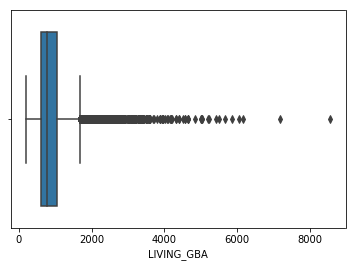

In [16]:
print(perc_outliers(sdat, 'LIVING_GBA', 1.5, 1.5))
sns.boxplot(x=sdat['LIVING_GBA'], whis=1.5)

/Users/Julia/miniconda3/envs/advanced-pip-example/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


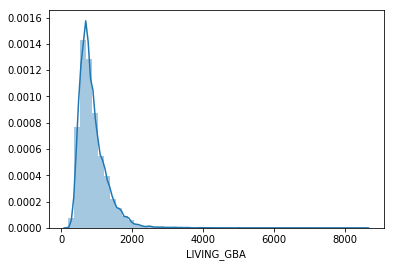

In [17]:
sns.distplot(sdat['LIVING_GBA'].dropna())

Percentage of outliers: 0.035896651888090506
None


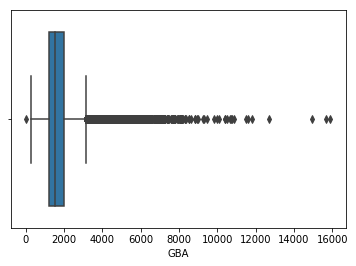

In [18]:
print(perc_outliers(sdat, 'GBA', 1.5, 1.5))
sns.boxplot(x=sdat['GBA'], whis=1.5)

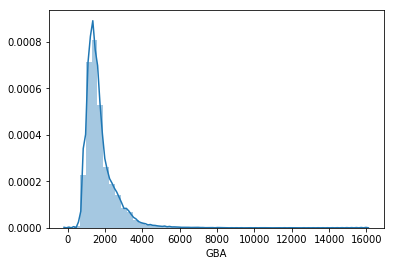

In [19]:
sns.distplot(sdat['GBA'].dropna())

Percentage of outliers: 0.0296183050501962
None


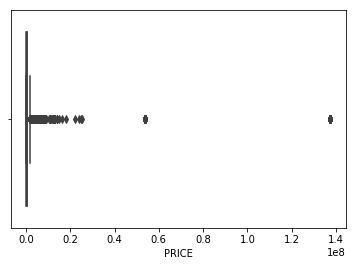

In [20]:
print(perc_outliers(sdat, 'PRICE', 1, 2.5))
sns.boxplot(x=sdat['PRICE'], whis=2.5)

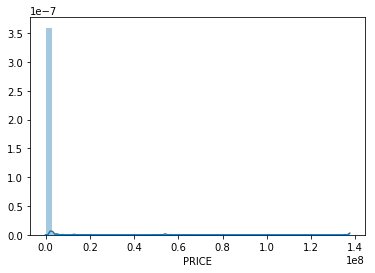

In [21]:
sns.distplot(sdat['PRICE'].dropna())

Percentage of outliers: 0.03231921724506956
None


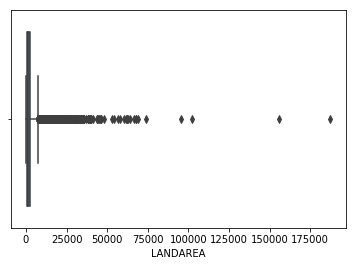

In [22]:
print(perc_outliers(sdat, 'LANDAREA', 1, 2.5))
sns.boxplot(x=sdat['LANDAREA'], whis=2.5)

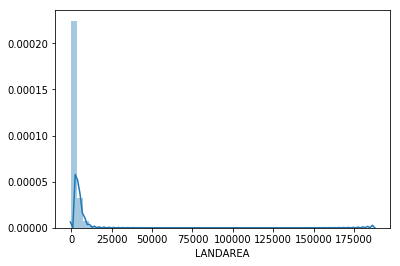

In [23]:
sns.distplot(sdat['LANDAREA'].dropna())

**Outlier detection for categorical data:**

In [24]:
#checking values for categorical data:
for col in catdf.columns:
    print(col) 
    print(catdf[col].value_counts().sort_index())
    print("")
    print("")

HEAT
Air Exchng           22
Air-Oil              69
Elec Base Brd       249
Electric Rad         93
Evp Cool             26
Forced Air        39386
Gravity Furnac       52
Hot Water Rad     22812
Ht Pump           16849
Ind Unit             35
No Data             211
Wall Furnace        707
Warm Cool         17332
Water Base Brd      272
Name: HEAT, dtype: int64


AC
0       38
N    18457
Y    79620
Name: AC, dtype: int64


SALEDATE
1982-06-11 00:00:00     1
1984-05-31 00:00:00     1
1984-07-20 00:00:00     1
1985-08-05 00:00:00     1
1986-06-10 00:00:00     1
1986-12-02 00:00:00     1
1988-04-13 00:00:00     1
1988-12-11 00:00:00     1
1990-05-17 00:00:00     1
1990-08-20 00:00:00     1
1990-09-29 00:00:00     1
1990-12-12 00:00:00     1
1991-03-29 00:00:00     1
1991-08-14 00:00:00     1
1991-11-29 00:00:00     1
1992-01-02 00:00:00     5
1992-01-03 00:00:00     2
1992-01-06 00:00:00     5
1992-01-07 00:00:00     4
1992-01-08 00:00:00     1
1992-01-09 00:00:00     4
1992-01-10 00:00

**Removing outliers:**

In [25]:
#The only data that was likely faulty (and not just out of "the norm") was
#STORIES: 250.00, 275.00, 826.00        
#YR_RMDL: 20

odat2 = sdat.loc[((sdat['STORIES'] < 30) | (sdat['STORIES'].isna()))  & ((sdat['YR_RMDL'] >= 1880) | (sdat['YR_RMDL'].isna()))]

print(odat2.shape)

(98110, 42)


In [26]:
#Numerical:
#Create a list of all row indices matching outliers from specified columns.
takind = []
def remove_outliers (df_in, col, slow, shigh):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-slow*iqr
    fence_high = q3+shigh*iqr
    global iout
    iout = (df_in.loc[(df_in[col] < fence_low) | (df_in[col] > fence_high)]).index.tolist()
    for i in iout:
        if i not in takind:
            takind.append(i) 
    
remove_outliers(odat2, 'GBA', 1.5, 1.5)
remove_outliers(odat2, 'LIVING_GBA', 1.5, 1.5)
remove_outliers(odat2, 'LANDAREA', 1, 2.5)
remove_outliers(odat2, 'PRICE', 1, 2.5)
print(len(takind))

8356


In [27]:
#Remove those rows
odatd = odat2.drop(index=takind)
print(odatd.shape)

(89754, 42)


**Removing and replacing null values using location for fill value predictions:** 

In [28]:
#percentage of missing data per row in new dataset
def missingdat(df):
    percnan=(df.isnull().sum(axis=0))/len(df)
    nulcolstat = percnan[percnan>0]
    nullist = (nulcolstat.index).tolist()
    nuldat = sdat[nullist]
    print(nulcolstat)
print(missingdat(odatd))

NUM_UNITS             0.422689
AYB                   0.001081
YR_RMDL               0.413486
STORIES               0.422967
SALEDATE              0.000011
GBA                   0.422689
STYLE                 0.422689
STRUCT                0.422689
GRADE                 0.422689
CNDTN                 0.422689
EXTWALL               0.422689
ROOF                  0.422689
INTWALL               0.422689
KITCHENS              0.422700
LIVING_GBA            0.577311
ASSESSMENT_SUBNBHD    0.195713
CENSUS_BLOCK          0.425864
dtype: float64
None


In [29]:
#create categorical and numerical dataframes
catcol = []
intcol = []
for col in odatd.columns:
    if (odatd[col].dtype == object):
        catcol.append(col)
    if (odatd[col].dtype == np.int64) or (odatd[col].dtype == np.float64):
        numcol.append(col)
catdf = odatd[catcol].astype('category')
numdf = odatd[numcol].astype(np.float64)

In [30]:
#using Latitute and Longitude to sort 
tsortd = odatd.sort_values(['LATITUDE', 'LONGITUDE'])

**Filling numerical nulls with rolling mean:**

In [35]:
#fill using rolling mean. Remove remaining NA vals later
dfill = pd.DataFrame()
for col in numdf.columns:
    dfill[col] = tsortd[col].fillna(tsortd[col].rolling(500, center=True, min_periods=1).mean())
print(missingdat(dfill))

NUM_UNITS     0.005548
STORIES       0.005548
GBA           0.005548
KITCHENS      0.005548
LIVING_GBA    0.007599
dtype: float64
None


**Filling categorical null values using mode values according to neighborhoods:**

In [31]:
#CAT df with nulls 
catnulls = catdf.columns[catdf.isna().any()].tolist()
catnulldf = catdf[catnulls]
#CAT df without nulls 
catgooddf = catdf.drop(columns=catnulls)

In [32]:
#Df with mode values. 
modedf = pd.DataFrame()
for col in catdf.columns:
    modedf[col] = tsortd.groupby('ASSESSMENT_NBHD')[col].apply(lambda x: x.mode())
modedf.head()

,,HEAT,AC,SALEDATE,QUALIFIED,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,GIS_LAST_MOD_DTTM,SOURCE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
ASSESSMENT_NBHD,,,,,,,,,,,,,,,,,,,,
16th Street Heights,0,Hot Water Rad,Y,2016-08-18 00:00:00,Q,2 Story,Single,Good Quality,Good,Common Brick,Metal- Sms,Hardwood,2018-07-22 18:01:43,Residential,16th Street Heights,049 A 16th Street Heights,002001 2010,Ward 4,2798,NW
American University,0,Warm Cool,Y,2005-09-30 00:00:00,Q,2 Story,Single,Good Quality,Good,Common Brick,Slate,Hardwood,2018-07-22 18:01:43,Residential,American University,001 B American University,001001 1013,Ward 3,1730,NW
Anacostia,0,Forced Air,Y,2013-07-16 00:00:00,Q,2 Story,Row Inside,Average,Average,Common Brick,Metal- Sms,Hardwood,2018-07-22 18:01:43,Residential,Anacostia,002 B Anacostia,007504 1004,Ward 8,5807,SE
Barry Farms,0,Forced Air,Y,2006-02-08 00:00:00,Q,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Hardwood,2018-07-22 18:01:38,Condominium,Barry Farms,NaN,007407 2008,Ward 8,5869,SE
Berkley,0,Warm Cool,Y,2014-06-27 00:00:00,Q,2 Story,Single,Very Good,Good,Common Brick,Comp Shingle,Hardwood,2018-07-22 18:01:43,Residential,Berkley,004 A Berkley,000802 1001,Ward 3,1368,NW


In [33]:
#Filling NaNs in mode df:

#find which groups have no subneighborhoods assigned
subindex = modedf[modedf['ASSESSMENT_SUBNBHD'].isnull()].index.tolist()

#get neighborhoods for each of those groups:
subnlist = []
for num in subindex:
    subnlist.append(modedf.loc[num, 'ASSESSMENT_NBHD'])
    
#assign neighborhood name to subneighborhood name:
fillvals = []
for i, val in zip(subindex, subnlist):
    modedf.loc[i, 'ASSESSMENT_SUBNBHD'] = val

In [34]:
#filling Central-tri 3 data with central-tri 1 data
print((modedf[modedf.isnull().any(axis=1)]).index.tolist())
modedf = modedf.fillna(method='ffill')

[('Central-tri 3', 0)]


In [35]:
#filling missing categorical data

new = pd.DataFrame()
catdf2 = catdf
for col in catnulldf.columns:
    #get index of missing values
    colindex = catdf2[catdf2[col].isnull()].index.tolist()
    #generate mode dictionary
    coldict = dict(zip(modedf['ASSESSMENT_NBHD'], modedf[col])) 
    #corresponding neighborhood list from df
    nlist = []
    for i in colindex:
        nlist.append(catdf2.loc[i, 'ASSESSMENT_NBHD'])           
    #fill nans
    for i, n in zip(colindex, nlist):
        filler = coldict[n]
        if filler not in catdf2[col].cat.categories:
            catdf2[col] = catdf2[col].cat.add_categories([filler])
        new[col] = catdf2[col].fillna(filler)

**Creating final dataframe by joining filled categorical and numerical dataframes:**

In [36]:
finaldf = (pd.concat([catgooddf, new, dfill], axis=1)).dropna()
print(finaldf.shape)
finaldf.head()

(85060, 42)


,HEAT,AC,QUALIFIED,GIS_LAST_MOD_DTTM,SOURCE,ASSESSMENT_NBHD,WARD,SQUARE,QUADRANT,SALEDATE,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,ASSESSMENT_SUBNBHD,CENSUS_BLOCK,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y,BATHRMS
0,Warm Cool,Y,Q,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,0152,NW,2003-11-25 00:00:00,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,040 D Old City 2,004201 2006,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,1,2522.0,1,2.0,5,24,1680,756.965909,20009.0,38.914680,-77.040832,4201.0,-77.040429,38.914881,4
3,Hot Water Rad,Y,Q,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,0152,NW,2006-07-12 00:00:00,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,040 D Old City 2,004201 2006,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,1,2484.0,1,2.0,3,24,1680,736.989247,20009.0,38.914683,-77.040629,4201.0,-77.040429,38.914881,4
7,Hot Water Rad,Y,Q,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,0152,NW,2011-09-29 00:00:00,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,040 D Old City 2,004201 2005,2.0,8,4,1906.0,2011.0,1972,3.0,1050000.0,1,2401.0,1,2.0,1,24,1627,882.933333,20009.0,38.915408,-77.040129,4201.0,-77.040429,38.914881,4
8,Warm Cool,Y,Q,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,0152,NW,2018-05-03 00:00:00,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,040 D Old City 2,004201 2005,2.0,7,3,1908.0,2008.0,1967,2.0,1430000.0,4,1488.0,1,2.0,1,24,1424,852.204724,20009.0,38.915017,-77.039903,4201.0,-77.040429,38.914881,4
14,Warm Cool,Y,Q,2018-07-22 18:01:43,Residential,Old City 2,Ward 2,0152,NW,2011-09-30 00:00:00,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,040 D Old City 2,004201 2005,2.0,5,3,1917.0,2000.0,1967,2.0,1325000.0,1,2692.0,1,2.0,1,24,1815,798.241935,20009.0,38.915038,-77.039716,4201.0,-77.040429,38.914881,4
